<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/Logistic%20%26%20Naive%20Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍄 Mushroom Classifier: Edible or Poisonous?

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('/content/mushrooms.csv')


In [24]:
df.shape

(8124, 23)

In [25]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [28]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [31]:
# Unique values per feature

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [32]:
# Class distribution

df['class'].value_counts()

,count
class,
e,4208
p,3916


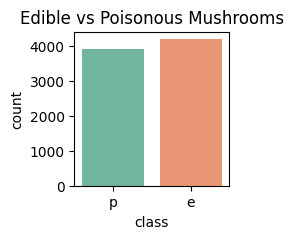

In [33]:
# Visualize class distribution

plt.figure(figsize=(2,2))
sns.countplot(data=df, x='class',hue='class', palette='Set2')
plt.title('Edible vs Poisonous Mushrooms')
plt.show()

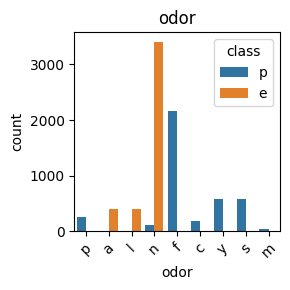

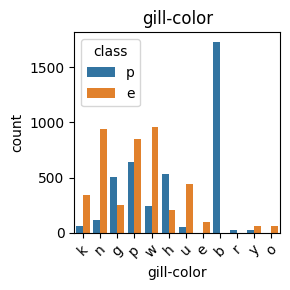

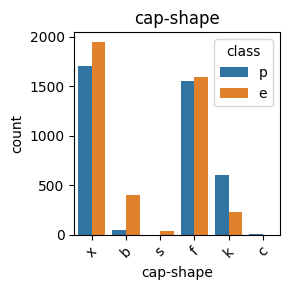

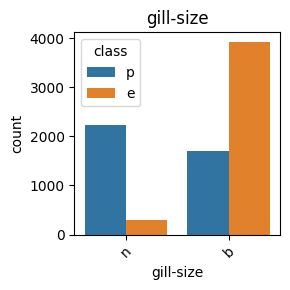

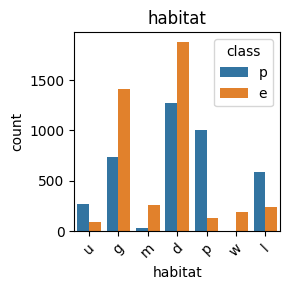

In [34]:
cols_to_plot = ['odor', 'gill-color', 'cap-shape', 'gill-size', 'habitat']
for col in cols_to_plot:
    plt.figure(figsize=(3,3))
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Preprocessing

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
# Encode all categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [37]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Split - Training & Testing Data


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Split data

x = df.drop('class', axis=1) # features
y = df['class'] # target variable (edible or poisonous)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 80% training data, 20% testing data
# random_state=42: same split every time

# Model Training


In [40]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression is used for binary classification
# max_iter=2000 allows the model to fully learn

logreg = LogisticRegression(max_iter=2000)

# Train the model
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

# Model Prediction


In [42]:
# Make predictions on test data
y_pred = logreg.predict(x_test)

# Model Evaluation


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9476923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Confusion Matrix:
 [[799  44]
 [ 41 741]]


| Metric    | Meaning                                       |
| --------- | ------------------------------------------------------ |
| Precision | When model predicts poisonous, how often is it correct |
| Recall    | How many actual poisonous mushrooms were caught        |
| F1-score  | Balance between precision and recall                   |
| Support   | Number of samples                                      |


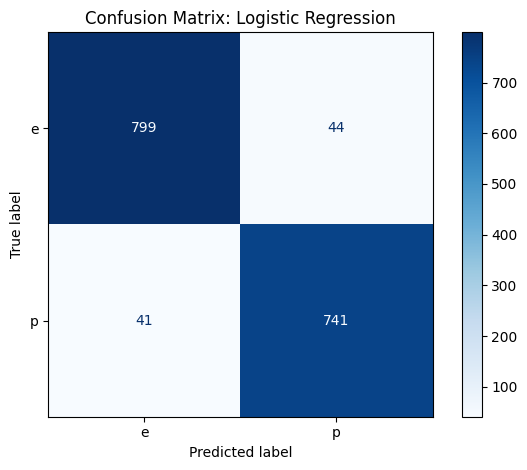

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['class'].classes_)

disp.plot(cmap='Blues')

plt.title(f'Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()


# Sample Prediction


In [60]:
# Sample mushroom input
sample = {
    'cap-shape': 'x',
    'cap-surface': 's',
    'cap-color': 'n',
    'bruises': 't',
    'odor': 'p',
    'gill-attachment': 'f',
    'gill-spacing': 'c',
    'gill-size': 'n',
    'gill-color': 'k',
    'stalk-shape': 'e',
    'stalk-root': 'b',
    'stalk-surface-above-ring': 's',
    'stalk-surface-below-ring': 's',
    'stalk-color-above-ring': 'w',
    'stalk-color-below-ring': 'w',
    'veil-type': 'p',
    'veil-color': 'w',
    'ring-number': 'o',
    'ring-type': 'p',
    'spore-print-color': 'k',
    'population': 's',
    'habitat': 'u'
}

In [61]:
# Encode the input using stored label encoders

encoded_sample = []
for col in x.columns:
    encoded_val = label_encoders[col].transform([sample[col]])[0]
    encoded_sample.append(encoded_val)

In [68]:
# Convert to DataFrame sincr model expects 2D input

sample_df = pd.DataFrame([encoded_sample], columns=x.columns)


In [69]:
# Make prediction

prediction = logreg.predict(sample_df)


In [70]:
#decode prediction (0,1 to e/p)

predicted_class = label_encoders['class'].inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)


Predicted Class: p
